In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

# torch.manual_seed(1)

Text(0.5, 0, 'x')

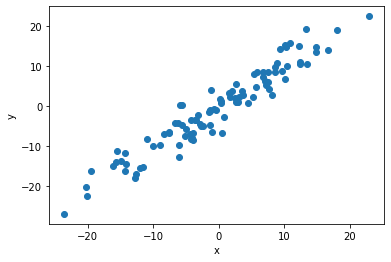

In [2]:
x = torch.randn(100, 1) * 10
y = x + torch.randn(100, 1) * 3
plt.plot(x.numpy(), y.numpy(), "o")
plt.ylabel("y")
plt.xlabel("x")

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size, learning_rate=None):
        if learning_rate is None:
            self.learning_rate = 1 / 100
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
model = LR(1, 1)

In [5]:
[w, b] = model.parameters()


def getparams():
    return (w[0, 0].item(), b[0].item())

In [6]:
def plot_fit(title):
    plt.title = title
    w1, b1 = getparams()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, "r")
    plt.scatter(x, y)
    plt.show()

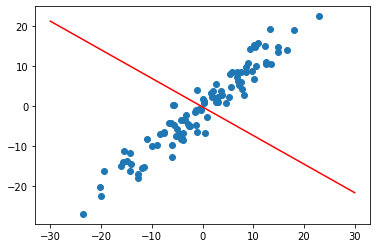

In [7]:
plot_fit("Inital Model")

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 280.8083190917969
epoch: 1 loss: 182.24990844726562
epoch: 2 loss: 119.31604766845703
epoch: 3 loss: 79.13015747070312
epoch: 4 loss: 53.469783782958984
epoch: 5 loss: 37.08457946777344
epoch: 6 loss: 26.62189483642578
epoch: 7 loss: 19.941024780273438
epoch: 8 loss: 15.675021171569824
epoch: 9 loss: 12.950987815856934
epoch: 10 loss: 11.211566925048828
epoch: 11 loss: 10.100863456726074
epoch: 12 loss: 9.391618728637695
epoch: 13 loss: 8.93872356414795
epoch: 14 loss: 8.649521827697754
epoch: 15 loss: 8.464842796325684
epoch: 16 loss: 8.346909523010254
epoch: 17 loss: 8.271594047546387
epoch: 18 loss: 8.223491668701172
epoch: 19 loss: 8.192768096923828
epoch: 20 loss: 8.173142433166504
epoch: 21 loss: 8.160601615905762
epoch: 22 loss: 8.152586936950684
epoch: 23 loss: 8.1474609375
epoch: 24 loss: 8.144181251525879
epoch: 25 loss: 8.142078399658203
epoch: 26 loss: 8.140730857849121
epoch: 27 loss: 8.139864921569824
epoch: 28 loss: 8.139303207397461
epoch: 29 loss: 8.1389

Text(0.5, 0, 'Epoc')

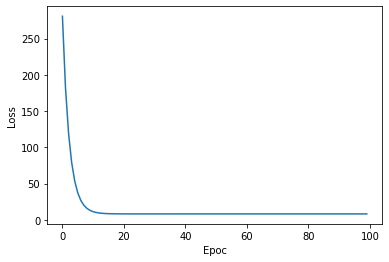

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoc")

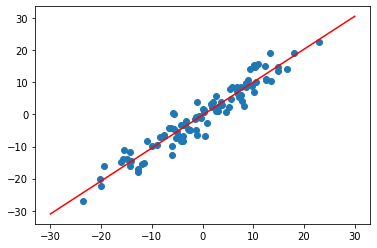

In [11]:
plot_fit("Trained Model")